## <span style='background:yellow'> Movie Recommendation </span>

In [2]:
import numpy as np
import pandas as pd

<span style='background:yellow'> The two dataset and its merge </span>

In [3]:
x = pd.read_csv(r'C:\Users\Admin\Desktop\ANUSHKA\MovieRecommendation\ml-latest-small\ml-latest-small\ratings.csv')

y = pd.read_csv(r'C:\Users\Admin\Desktop\ANUSHKA\MovieRecommendation\ml-latest-small\ml-latest-small\movies.csv')

df = pd.merge(x, y, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [5]:
df.groupby('title')['rating'].mean().sort_values(ascending=False) #ratings ka mean from all users with title in descending order(it isnt written descending=True cause sort_value dosent have a keyword named descending)


df.groupby('title')['rating'].count().sort_values(ascending=False) #title with the count of ratings 

ratings = pd.DataFrame(df.groupby('title')['rating'].mean()) #title and ratings in order of dataset

ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings

,rating,num of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


<span style='background :yellow'> Countplot </span>

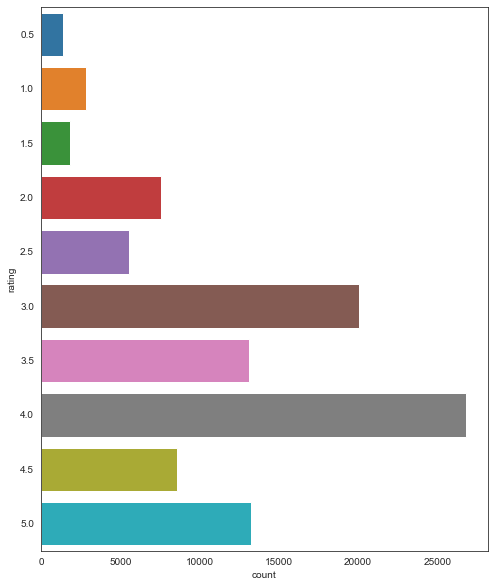

In [27]:
plt.figure(figsize=(8,10)) #8=width,10=length
x = sns.countplot( y='rating', data=df)

<span style='background :yellow' > Histogram </span>

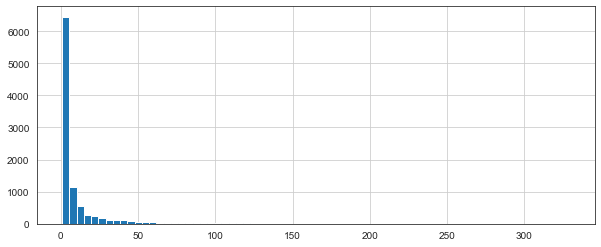

In [21]:
plt.figure(figsize = (10,4))
ratings['num of ratings'].hist(bins=70)

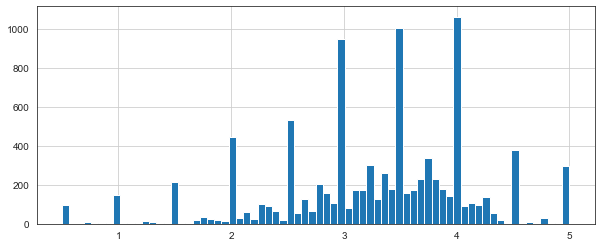

In [7]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)  #graph of ratings to num of users

<span style='background :yellow' > Jointplot </span>

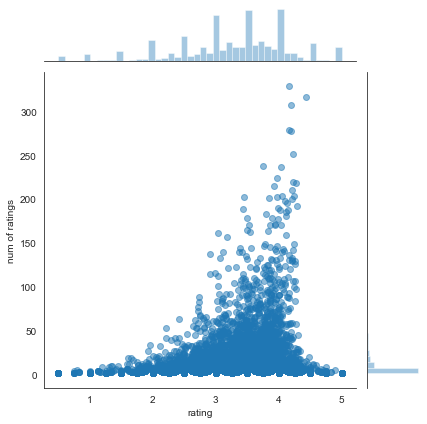

In [8]:
sns.jointplot(x='rating', y='num of ratings', data=ratings,alpha=0.5) #aplha=0.5 is rgba value which is from 0 to 1, transperancy increases from 0 to 1

In [28]:
df1 = df.pivot_table(index='userId',columns='title', values='rating')  #which userid has given rating to which movie using pivottable


In [22]:
ToyStory_user_ratings = df1['Toy Story (1995)'] #toystory's ratings given by all userid's


In [11]:
similar_to_ToyStory = df1.corrwith(ToyStory_user_ratings) #pairwise correlate between rows or columns

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [23]:
corr_ToyStory = pd.DataFrame(similar_to_ToyStory, columns=['Correlation'])
 #correlating with all movies

In [24]:
corr_ToyStory.dropna(inplace=True) #max correlation value is 1 higher the value it gets recommended the -1 correlation is said to be the strongest

<span style='background:yellow'> Correlation with movies </span>

In [14]:
corr_ToyStory.sort_values('Correlation', ascending = False)

,Correlation
title,
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0
...,...
In a World... (2013),-1.0
The Drop (2014),-1.0
Mo' Money (1992),-1.0


In [25]:
corr_ToyStory = corr_ToyStory.join(ratings['num of ratings'])


<span style='background :yellow' > Recommended Movies </span>

In [26]:
corr_ToyStory.head(10)[corr_ToyStory.head(10)['num of ratings']>5].sort_values('Correlation',ascending=False) #if num of ratings is >1 it will display and the correlations values will be in descng order

,Correlation,num of ratings
title,,
101 Dalmatians (1996),0.580479,47
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.399643,44
(500) Days of Summer (2009),0.353833,42
10 Things I Hate About You (1999),0.322741,54
"'burbs, The (1989)",0.240563,17
"10,000 BC (2008)",-0.251279,17
10 Cloverfield Lane (2016),-0.285732,14
*batteries not included (1987),-0.427425,7


In [17]:
Babe_user_ratings = df1['Babe (1995)']
similar_to_Babe = df1.corrwith(Babe_user_ratings)
corr_Babe = pd.DataFrame(similar_to_Babe, columns=['Correlation'])
corr_Babe.dropna(inplace=True)
corr_Babe = corr_Babe.join(ratings['num of ratings'])
corr_Babe.head(5)[corr_Babe.head(5)['num of ratings']>1].sort_values('Correlation',ascending=False)

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
*batteries not included (1987),1.000000,7
(500) Days of Summer (2009),-0.109952,42
10 Things I Hate About You (1999),-0.380729,54
"'burbs, The (1989)",-0.588215,17
"10,000 BC (2008)",-0.790912,17
